In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlxtend
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import re

In [2]:
italian_tweets_text = pd.read_csv('italian_tweet_text_notusa.csv',header=None)

In [3]:
stopwords = pd.read_json('stopwords-it.json')

In [4]:
italian_tweets_text.head()

,0,1
0,0,Masterchef il vincitore Valerio Braschi Maste...
1,1,Sternhell ci spiega il nazionalismo razzista e...
2,2,httpstcoCHnirfPdLO I Sioux sono arrivati a Wa...
3,3,La stagione di GamesOfThrones in tv dal lugl...
4,4,Su Left in edicola domani il racconto e le int...


In [5]:
stopwords = stopwords[0].tolist()

In [6]:
italian_tweets_text.shape[0]

38630

In [7]:
documents=italian_tweets_text[1].tolist()
documents=[re.sub(r'(\s)https\w+', r'', m.lower()) for m in documents]
documents

['masterchef il vincitore  valerio braschi masterchefit masterchefit',
 'sternhell ci spiega il nazionalismo razzista e socialista di marine le pen',
 'httpstcochnirfpdlo  i sioux sono arrivati a washington marcia indiana contro trump nativenationsmarchondc',
 'la stagione  di gamesofthrones in tv dal  luglio il teaser dellannuncio',
 'su left in edicola domani il racconto e le interviste di frmaselli da sotto i palchi dei comizi in francia',
 'caso consip tiziano renzi si autosospende da segretario pd rignano',
 'peggio di linkedin che non funziona c chi dice che linkedin non funziona linkedinitalia linkiesta',
 'morire di amazon cos lecommerce far sparire i negozi via linkiesta',
 'come fa uno a farsi chiamare direttore creativo intervista a oliviero toscani  via linkiesta',
 'interatalanta gasperini vendetta sullinter no sbagliai io ad accettare lofferta',
 'alstom e ntl lanciano aptis soluzione di mobilit innovativa',
 'daniesilvestricarmenconsolimaxgazze insieme per il live pi lun

In [8]:
documents_trial = documents[:15000]

In [9]:
%%capture
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(documents_trial)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [74]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=5)
data = model.fit(X)

In [96]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
common_words = model.cluster_centers_.argsort()[:,-1:-21:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(terms[word] for word in centroid))

Top terms per cluster:
0 : pi, video, trump, usa, corea, nord, ca, siria, top, chocolate, terrebehlog, mcga, lastampa, antoniosabatojr, rt, sabato, support, maga, news, vote
1 : renzi, pd, primarie, emiliano, orlando, lingotto, voto, primariepd, consip, sinistra, matteo, ms, circoli, fattoquotidiano, scenaripolitici, segretario, pisapia, voti, quotidiano, edicola
2 : roma, italia, foto, perch, napoli, milano, marzo, migranti, aprile, michelle, rt, francia, nuova, donne, diretta, euro, morti, blog, alitalia, arriva


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

principalComponents = pca.fit_transform(dist)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5', 'principal component 6',
                          'principal component 7', 'principal component 8',
                          'principal component 9', 'principal component 10'])

a = principalDf.iloc[:,0]
b = principalDf.iloc[:,1]
c = principalDf.iloc[:,2]
d = principalDf.iloc[:,3]
e = principalDf.iloc[:,4]
f = principalDf.iloc[:,5]
g = principalDf.iloc[:,6]
h = principalDf.iloc[:,7]
i = principalDf.iloc[:,8]
j = principalDf.iloc[:,9]

In [ ]:
#import os  # for os.path.basename

#import matplotlib.pyplot as plt
#import matplotlib as mpl

#from sklearn.manifold import MDS

#MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
#mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

#pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

#xs, ys = pos[:, 0], pos[:, 1]

In [23]:
clusters = model.labels_.tolist()
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers'}

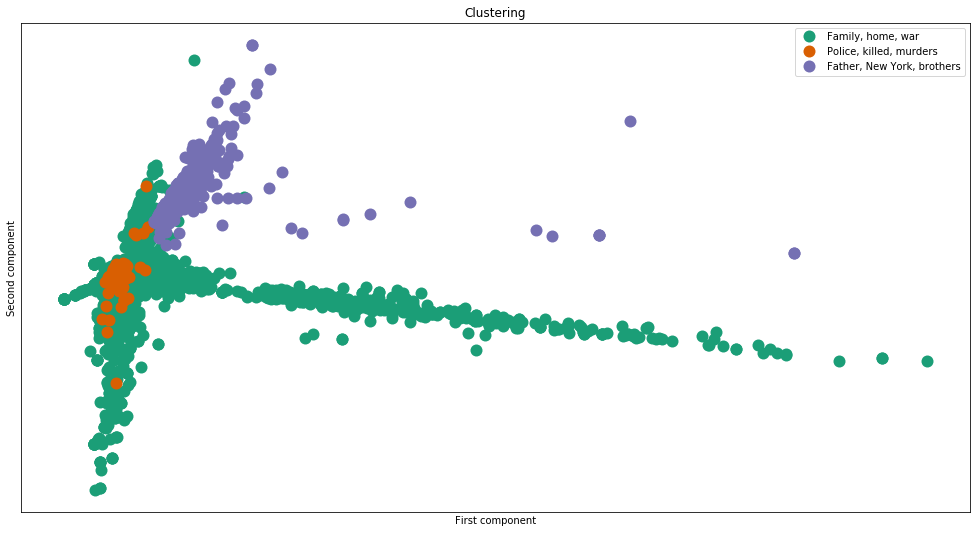

In [95]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=c, y=e, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
#    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)  
ax.set_xlabel("First component")
ax.set_ylabel("Second component")
ax.legend(loc="best")
ax.set_title("Clustering")
    
    
plt.show() #show the plot